In [1]:
! mkdir -p PLOTS-github

In [2]:
import json
import glob
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
userrepos_lists = {
    "repo_id": [],
    "owner_login": [],
    "owner_id": [],
    "repo_name": [],
    "created_at": [],
    "pushed_at": [],
    "updated_at": [],
    "fork": [],
    "language": [],
    "size": [],
    "description": [],
    "homepage": [],
    "license": [],
    "forks_count": [],
    "open_issues_count": [],
    "stargazers_count": [],
    "watchers_count": [],
}
for filename in glob.glob("/home/jpivarski/storage/data/physicists/forks-of-cmssw-2021-02-24/user-repos/*.json"):
    for repo in json.load(open(filename)):
        userrepos_lists["repo_id"].append(repo["id"])
        userrepos_lists["owner_login"].append(repo["owner"]["login"])
        userrepos_lists["owner_id"].append(repo["owner"]["id"])
        userrepos_lists["repo_name"].append(repo["name"])
        userrepos_lists["created_at"].append(pd.to_datetime(repo["created_at"]))
        userrepos_lists["pushed_at"].append(pd.to_datetime(repo["pushed_at"]))
        userrepos_lists["updated_at"].append(pd.to_datetime(repo["updated_at"]))
        userrepos_lists["fork"].append(repo["fork"])
        userrepos_lists["language"].append(repo["language"])
        userrepos_lists["size"].append(repo["size"])
        userrepos_lists["description"].append(repo["description"])
        userrepos_lists["homepage"].append(repo["homepage"])
        userrepos_lists["license"].append(None if repo["license"] is None else repo["license"]["name"])
        userrepos_lists["forks_count"].append(repo["forks_count"])
        userrepos_lists["open_issues_count"].append(repo["open_issues_count"])
        userrepos_lists["stargazers_count"].append(repo["stargazers_count"])
        userrepos_lists["watchers_count"].append(repo["watchers_count"])

In [4]:
userrepos = pd.DataFrame(userrepos_lists)
userrepos

,repo_id,owner_login,owner_id,repo_name,created_at,pushed_at,updated_at,fork,language,size,description,homepage,license,forks_count,open_issues_count,stargazers_count,watchers_count
0,35404785,helee,6985026,CATTools,2015-05-11 05:49:31+00:00,2015-08-08 11:32:53+00:00,2015-05-11 05:49:31+00:00,True,C++,2788,for cms analysis,None,None,0,0,0,0
1,35404621,helee,6985026,cmssw,2015-05-11 05:45:33+00:00,2015-12-04 09:13:52+00:00,2015-05-11 05:48:44+00:00,True,C++,834853,CMS Offline Software,http://cms-sw.github.io/,None,0,0,0,0
2,132709357,helee,6985026,EgammaAnalysis-TnPTreeProducer,2018-05-09 06:06:02+00:00,2021-01-12 15:40:14+00:00,2018-05-09 06:06:04+00:00,True,Python,41157,TnP package for EGM,None,None,1,0,0,0
3,156663899,helee,6985026,egm_tnp_analysis,2018-11-08 06:59:13+00:00,2018-10-22 15:26:44+00:00,2018-11-08 06:59:15+00:00,True,Python,273,package to analyse egm tnp trees,,None,1,0,0,0
4,131195399,helee,6985026,GEM_QC_SW,2018-04-26 18:26:31+00:00,2018-05-07 17:33:22+00:00,2018-05-07 08:33:30+00:00,True,C,192,None,None,None,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35903,16122368,hkaushalya,5091507,haddws,2014-01-21 23:24:01+00:00,2014-02-15 16:25:46+00:00,2019-08-13 11:49:27+00:00,False,C++,192,hadd with weights (or better hadd). Adds histo...,None,GNU General Public License v3.0,5,0,5,5
35904,16212173,hkaushalya,5091507,hadoop-R,2014-01-24 17:56:31+00:00,2012-10-17 21:40:49+00:00,2014-01-24 17:56:32+00:00,True,R,143,Example code for running R on Hadoop,,None,0,0,0,0
35905,19552028,hkaushalya,5091507,hkaushalya.github.io,2014-05-07 22:07:39+00:00,2014-05-07 22:17:07+00:00,2014-05-07 22:17:08+00:00,False,None,108,My first GitHub page,None,None,0,0,0,0
35906,284286671,msedghi-1305,68026516,cmssw,2020-08-01 15:28:47+00:00,2020-08-03 15:02:21+00:00,2020-08-03 15:02:29+00:00,True,C++,1126925,CMS Offline Software,http://cms-sw.github.io/,Apache License 2.0,0,0,0,0


In [5]:
users_with_cmssw = userrepos[(userrepos["repo_name"] == "cmssw") & (userrepos["fork"])]["owner_login"]
userrepos_cut = userrepos[userrepos["owner_login"].isin(users_with_cmssw)]
userrepos_cut = userrepos_cut[~userrepos_cut["fork"]]

userrepos_cut["Python"] = userrepos_cut["language"] == "Python"
userrepos_cut["Jupyter"] = userrepos_cut["language"] == "Jupyter Notebook"
userrepos_cut["C and C++"] = (userrepos_cut["language"] == "C") | (userrepos_cut["language"] == "C++")

In [6]:
def smooth(series, colors, ax):
    for s, c in zip(series, colors):
        s[(pd.to_datetime("2013-01-01") < s.index.values) & (s.index.values < pd.to_datetime("2021-02-01"))].rolling(
            4, center=True, win_type="gaussian"
        ).mean(std=2).plot(color=c, ax=ax)

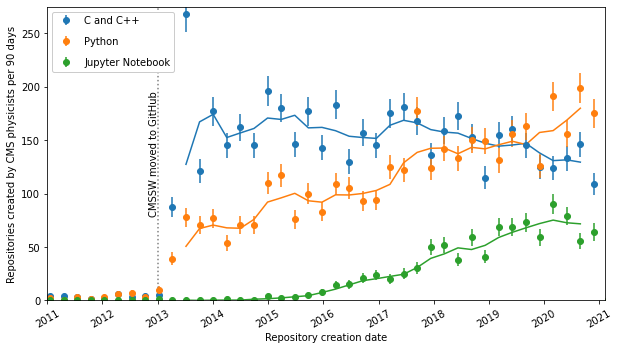

In [7]:
physicists = userrepos_cut.copy()
physicists.index = physicists["created_at"]
bylanguage = physicists[["C and C++", "Python", "Jupyter"]].resample("90D", origin=userrepos_cut["created_at"].max()).sum()
ax = bylanguage.plot(yerr=np.sqrt(bylanguage), marker="o", ls="none", rot=0, figsize=(10, 6))
smooth([bylanguage["C and C++"], bylanguage["Python"], bylanguage["Jupyter"]], ["tab:blue", "tab:orange", "tab:green"], ax)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.5*275, "CMSSW moved to GitHub", rotation=90, va="center")
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("Repositories created by CMS physicists per 90 days")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2021-02-10"))
ax.set_ylim(0, 275)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], [
    "C and C++", "Python", "Jupyter Notebook",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.get_figure().savefig("PLOTS-github/gihub-repo-language.svg")
ax.get_figure().savefig("PLOTS-github/gihub-repo-language.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-repo-language.png")

In [8]:
userrepos_cut2 = userrepos[
    userrepos["owner_login"].isin(users_with_cmssw) &
    ~userrepos["fork"]
].copy()
userrepos_cut2["C and C++"] = (userrepos_cut2["language"] == "C") | (userrepos_cut2["language"] == "C++")
userrepos_cut2["Python"] = userrepos_cut2["language"] == "Python"
userrepos_cut2["Jupyter"] = userrepos_cut2["language"] == "Jupyter Notebook"
userrepos_cut2 = userrepos_cut2.groupby([
    pd.Grouper(key="owner_login"),
    pd.Grouper(key="created_at", freq="90D", origin=userrepos_cut["created_at"].max()),
])[["C and C++", "Python", "Jupyter"]].sum()
sum1 = userrepos_cut2.groupby(level=1).count()
sumx = userrepos_cut2.groupby(level=1).sum()
sumxx = (userrepos_cut2**2).groupby(level=1).sum()
y = (sumx / sum1)
yerr = np.sqrt((sumxx / sum1) - (sumx / sum1)**2) / np.sqrt(sum1)

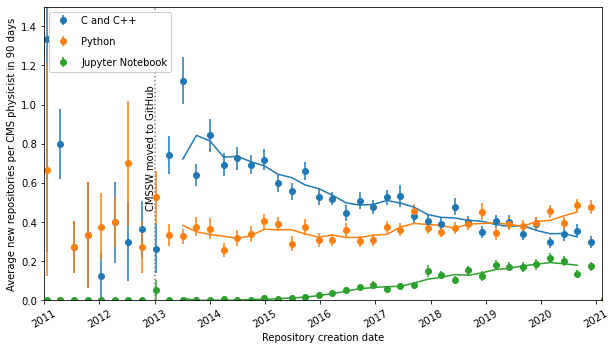

In [9]:
ax = y.plot(yerr=yerr, marker="o", ls="none", rot=0, figsize=(10, 6))
smooth([y["C and C++"], y["Python"], y["Jupyter"]], ["tab:blue", "tab:orange", "tab:green"], ax)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 1.1, "CMSSW moved to GitHub", rotation=90, va="top")
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("Average new repositories per CMS physicist in 90 days")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2021-02-10"))
ax.set_ylim(0, 1.5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], [
    "C and C++", "Python", "Jupyter Notebook",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.get_figure().savefig("PLOTS-github/gihub-repo-language-byuser.svg")
ax.get_figure().savefig("PLOTS-github/gihub-repo-language-byuser.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-repo-language-byuser.png")

In [10]:
def get_search_vstime(directory, wildcard="*", parent="forks-of-cmssw-2021-02-24/searches"):
    search_lists = {
        "repo_id": [],
        "owner_login": [],
        "owner_id": [],
        "repo_name": [],
        "path": [],
        "fork": [],
    }

    for filename in glob.glob("/home/jpivarski/storage/data/physicists/{}/{}/{}.json".format(parent, directory, wildcard)):
        jsondata = json.load(open(filename))
        if jsondata.get("message") != "Validation Failed":
            for match in jsondata["items"]:
                search_lists["repo_id"].append(match["repository"]["id"])
                search_lists["owner_login"].append(match["repository"]["owner"]["login"])
                search_lists["owner_id"].append(match["repository"]["owner"]["id"])
                search_lists["repo_name"].append(match["repository"]["name"])
                search_lists["path"].append(match["path"])
                search_lists["fork"].append(match["repository"]["fork"])

    search = pd.DataFrame(search_lists)
    search.set_index(["owner_login", "repo_name"], inplace=True, drop=False)

    search_vstime = pd.merge(search, userrepos.set_index(["owner_login", "repo_name"]))
    search_vstime.set_index(["owner_login", "repo_name", "created_at"], inplace=True)
    search_vstime = search_vstime.groupby(level=2).max()["repo_id"] != 0
    search_vstime = search_vstime.resample("90D", origin=userrepos_cut["created_at"].max()).sum()
    return search_vstime

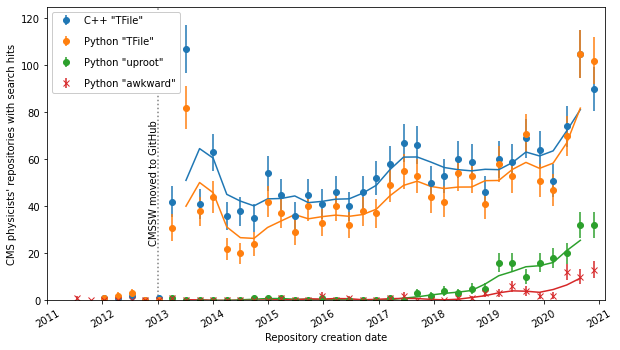

In [11]:
search_cpp_tfile = get_search_vstime("cpp-tfile")
search_python_tfile = get_search_vstime("python-tfile")
search_uproot_vstime = get_search_vstime("python-uproot")
search_awkward_vstime = get_search_vstime("python-awkward")

ax = search_cpp_tfile.plot(yerr=np.sqrt(search_cpp_tfile), marker="o", ls="none", rot=0, figsize=(10, 6))
search_python_tfile.plot(yerr=np.sqrt(search_python_tfile), marker="o", ls="none", rot=0, ax=ax)
search_uproot_vstime.plot(yerr=np.sqrt(search_uproot_vstime), marker="o", ls="none", rot=0, ax=ax)
search_awkward_vstime.plot(yerr=np.sqrt(search_awkward_vstime), marker="x", ls="none", rot=0, ax=ax)
smooth([search_cpp_tfile, search_python_tfile, search_uproot_vstime, search_awkward_vstime], ["tab:blue", "tab:orange", "tab:green", "tab:red"], ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2021-02-10"))
ax.set_ylim(0, 125)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[4:], [
    "C++ \"TFile\"", "Python \"TFile\"", "Python \"uproot\"", "Python \"awkward\"",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.4*125, "CMSSW moved to GitHub", rotation=90, va="center")
ax.get_figure().savefig("PLOTS-github/gihub-search-tfile-uproot-awkward.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-tfile-uproot-awkward.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-tfile-uproot-awkward.png")

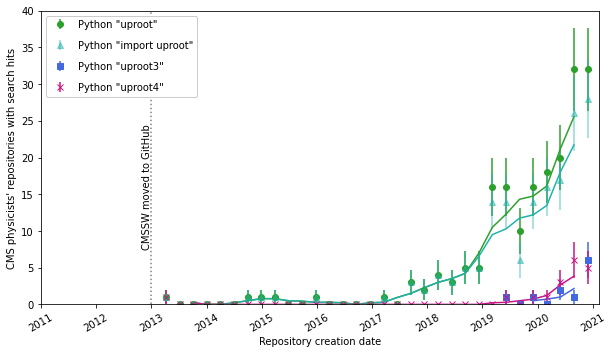

In [12]:
search_uproot_vstime = get_search_vstime("python-uproot")
search_import_uproot_vstime = get_search_vstime("python-import-uproot")
search_uproot3_vstime = get_search_vstime("python-uproot3")
search_uproot4_vstime = get_search_vstime("python-uproot4")

ax = search_uproot_vstime.plot(yerr=np.sqrt(search_uproot_vstime), marker="o", c="tab:green", ls="none", rot=0, figsize=(10, 6))
search_import_uproot_vstime.plot(yerr=np.sqrt(search_import_uproot_vstime), marker="^", c="lightseagreen", alpha=0.5, ls="none", rot=0, ax=ax)
search_uproot3_vstime.plot(yerr=np.sqrt(search_uproot3_vstime), marker="s", c="royalblue", ls="none", rot=0, ax=ax)
search_uproot4_vstime.plot(yerr=np.sqrt(search_uproot4_vstime), marker="x", c="mediumvioletred", ls="none", rot=0, ax=ax)
smooth([search_uproot_vstime, search_import_uproot_vstime, search_uproot3_vstime, search_uproot4_vstime], ["tab:green", "lightseagreen", "royalblue", "mediumvioletred"], ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2021-02-10"))
ax.set_ylim(0, 40)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[4:], [
    "Python \"uproot\"", "Python \"import uproot\"", "Python \"uproot3\"", "Python \"uproot4\"",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.4*40, "CMSSW moved to GitHub", rotation=90, va="center")
ax.get_figure().savefig("PLOTS-github/gihub-search-uproot-variations.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-uproot-variations.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-uproot-variations.png")

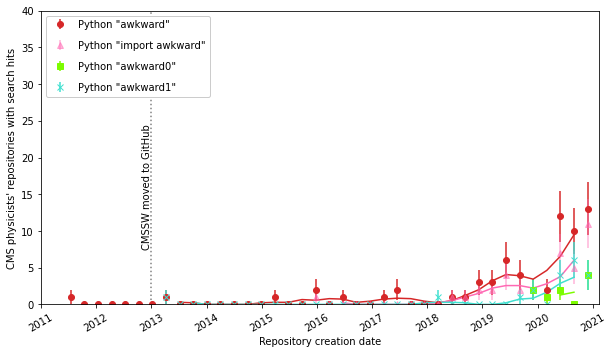

In [13]:
search_awkward_vstime = get_search_vstime("python-awkward")
search_import_awkward_vstime = get_search_vstime("python-import-awkward")
search_awkward0_vstime = get_search_vstime("python-awkward0")
search_awkward1_vstime = get_search_vstime("python-awkward1")

ax = search_awkward_vstime.plot(yerr=np.sqrt(search_awkward_vstime), marker="o", c="tab:red", ls="none", rot=0, figsize=(10, 6))
search_import_awkward_vstime.plot(yerr=np.sqrt(search_import_awkward_vstime), marker="^", c="hotpink", alpha=0.5, ls="none", rot=0, ax=ax)
search_awkward0_vstime.plot(yerr=np.sqrt(search_awkward0_vstime), marker="s", c="lawngreen", ls="none", rot=0, ax=ax)
search_awkward1_vstime.plot(yerr=np.sqrt(search_awkward1_vstime), marker="x", c="turquoise", ls="none", rot=0, ax=ax)
smooth([search_awkward_vstime, search_import_awkward_vstime, search_awkward0_vstime, search_awkward1_vstime], ["tab:red", "hotpink", "lawngreen", "turquoise"], ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2021-02-10"))
ax.set_ylim(0, 40)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[4:], [
    "Python \"awkward\"", "Python \"import awkward\"", "Python \"awkward0\"", "Python \"awkward1\"",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.4*40, "CMSSW moved to GitHub", rotation=90, va="center")
ax.get_figure().savefig("PLOTS-github/gihub-search-awkward-variations.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-awkward-variations.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-awkward-variations.png")

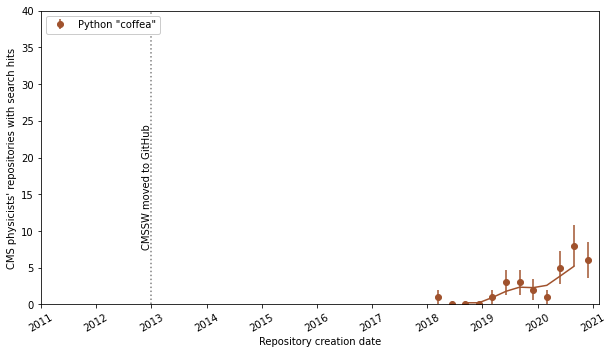

In [14]:
search_coffea_vstime = get_search_vstime("python-coffea")

ax = search_coffea_vstime.plot(yerr=np.sqrt(search_coffea_vstime), marker="o", c="sienna", ls="none", rot=0, figsize=(10, 6))
smooth([search_coffea_vstime], ["sienna"], ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2021-02-10"))
ax.set_ylim(0, 40)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], [
    "Python \"coffea\"",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.4*40, "CMSSW moved to GitHub", rotation=90, va="center")
ax.get_figure().savefig("PLOTS-github/gihub-search-coffea.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-coffea.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-coffea.png")

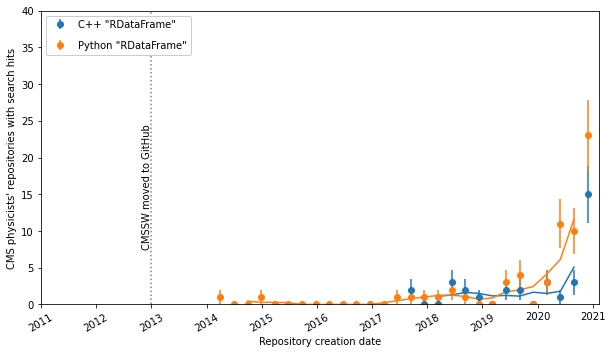

In [15]:
search_cpp_rdataframe_vstime = get_search_vstime("cpp-rdataframe")
search_python_rdataframe_vstime = get_search_vstime("python-rdataframe")

ax = search_cpp_rdataframe_vstime.plot(yerr=np.sqrt(search_cpp_rdataframe_vstime), marker="o", ls="none", rot=0, figsize=(10, 6))
search_python_rdataframe_vstime.plot(yerr=np.sqrt(search_python_rdataframe_vstime), marker="o", ls="none", rot=0, ax=ax)
smooth([search_cpp_rdataframe_vstime, search_python_rdataframe_vstime], ["tab:blue", "tab:orange"], ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2021-02-10"))
ax.set_ylim(0, 40)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[2:], [
    "C++ \"RDataFrame\"", "Python \"RDataFrame\"",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.4*40, "CMSSW moved to GitHub", rotation=90, va="center")
ax.get_figure().savefig("PLOTS-github/gihub-search-rdataframe.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-rdataframe.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-rdataframe.png")

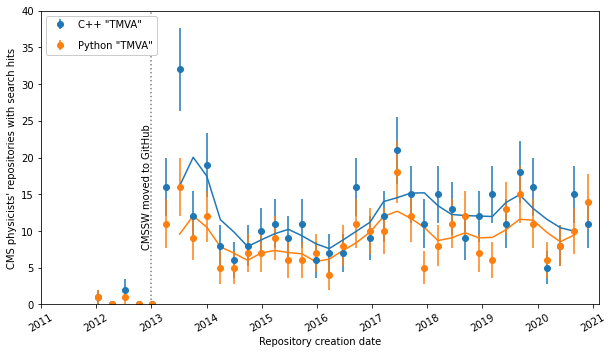

In [16]:
search_cpp_tmva_vstime = get_search_vstime("cpp-tmva")
search_python_tmva_vstime = get_search_vstime("python-tmva")

ax = search_cpp_tmva_vstime.plot(yerr=np.sqrt(search_cpp_tmva_vstime), marker="o", ls="none", rot=0, figsize=(10, 6))
search_python_tmva_vstime.plot(yerr=np.sqrt(search_python_tmva_vstime), marker="o", ls="none", rot=0, ax=ax)
smooth([search_cpp_tmva_vstime, search_python_tmva_vstime], ["tab:blue", "tab:orange"], ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2021-02-10"))
ax.set_ylim(0, 40)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[2:], [
    "C++ \"TMVA\"", "Python \"TMVA\"",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.4*40, "CMSSW moved to GitHub", rotation=90, va="center")
ax.get_figure().savefig("PLOTS-github/gihub-search-tmva.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-tmva.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-tmva.png")

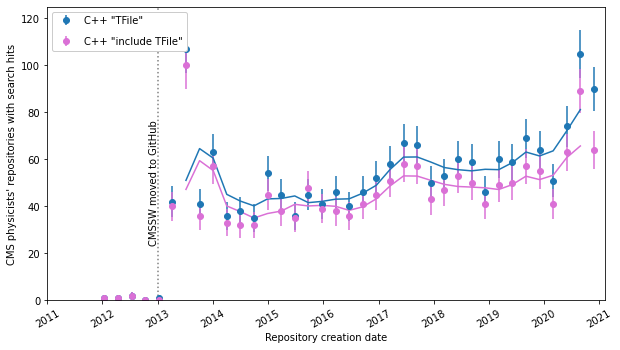

In [17]:
search_cpp_tfile = get_search_vstime("cpp-tfile")
search_cpp_include_tfile = get_search_vstime("cpp-include-tfile")

ax = search_cpp_tfile.plot(yerr=np.sqrt(search_cpp_tfile), marker="o", ls="none", rot=0, figsize=(10, 6))
search_cpp_include_tfile.plot(yerr=np.sqrt(search_cpp_include_tfile), marker="o", color="orchid", ls="none", rot=0, ax=ax)
smooth([search_cpp_tfile, search_cpp_include_tfile], ["tab:blue", "orchid"], ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2021-02-10"))
ax.set_ylim(0, 125)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[2:], [
    "C++ \"TFile\"", "C++ \"include TFile\"",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.4*125, "CMSSW moved to GitHub", rotation=90, va="center")
ax.get_figure().savefig("PLOTS-github/gihub-search-cpp-tfile-variations.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-cpp-tfile-variations.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-cpp-tfile-variations.png")

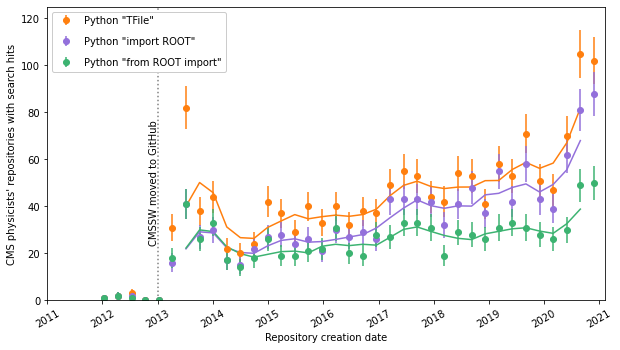

In [18]:
search_python_tfile = get_search_vstime("python-tfile")
search_python_import_root = get_search_vstime("python-import-root")
search_python_from_root_import = get_search_vstime("python-from-root-import")

ax = search_python_tfile.plot(yerr=np.sqrt(search_python_tfile), marker="o", color="tab:orange", ls="none", rot=0, figsize=(10, 6))
search_python_import_root.plot(yerr=np.sqrt(search_python_import_root), marker="o", color="mediumpurple", ls="none", rot=0, ax=ax)
search_python_from_root_import.plot(yerr=np.sqrt(search_python_from_root_import), marker="o", color="mediumseagreen", ls="none", rot=0, ax=ax)
smooth([search_python_tfile, search_python_import_root, search_python_from_root_import], ["tab:orange", "mediumpurple", "mediumseagreen"], ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2021-02-10"))
ax.set_ylim(0, 125)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], [
    "Python \"TFile\"", "Python \"import ROOT\"", "Python \"from ROOT import\"",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.4*125, "CMSSW moved to GitHub", rotation=90, va="center")
ax.get_figure().savefig("PLOTS-github/gihub-search-python-root-variations.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-python-root-variations.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-python-root-variations.png")

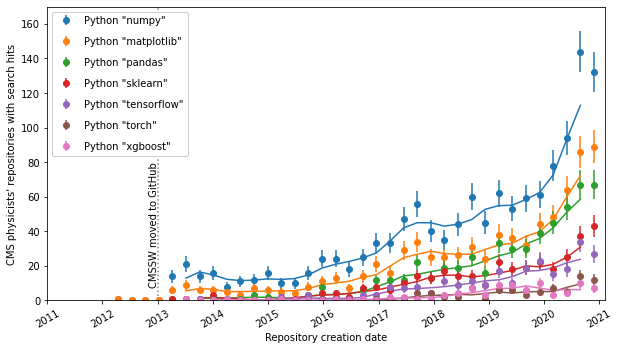

In [19]:
search_numpy = get_search_vstime("python-numpy")
search_matplotlib = get_search_vstime("python-matplotlib")
search_pandas = get_search_vstime("python-pandas")
search_sklearn = get_search_vstime("python-sklearn")
search_tensorflow = get_search_vstime("python-tensorflow")
search_torch = get_search_vstime("python-torch")
search_xgboost = get_search_vstime("python-xgboost")

ax = search_numpy.plot(yerr=np.sqrt(search_numpy), marker="o", ls="none", rot=0, figsize=(10, 6))
search_matplotlib.plot(yerr=np.sqrt(search_matplotlib), marker="o", ls="none", rot=0, ax=ax)
search_pandas.plot(yerr=np.sqrt(search_pandas), marker="o", ls="none", rot=0, ax=ax)
search_sklearn.plot(yerr=np.sqrt(search_sklearn), marker="o", ls="none", rot=0, ax=ax)
search_tensorflow.plot(yerr=np.sqrt(search_tensorflow), marker="o", ls="none", rot=0, ax=ax)
search_torch.plot(yerr=np.sqrt(search_torch), marker="o", ls="none", rot=0, ax=ax)
search_xgboost.plot(yerr=np.sqrt(search_xgboost), marker="o", ls="none", rot=0, ax=ax)
smooth([search_numpy, search_matplotlib, search_pandas, search_sklearn, search_tensorflow, search_torch, search_xgboost],
       plt.rcParams["axes.prop_cycle"].by_key()["color"] * 2, ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2021-02-10"))
ax.set_ylim(0, 170)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[7:], [
    "Python \"numpy\"", "Python \"matplotlib\"", "Python \"pandas\"", "Python \"sklearn\"", "Python \"tensorflow\"", "Python \"torch\"", "Python \"xgboost\"",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.35*125, "CMSSW moved to GitHub", rotation=90, va="center")
ax.get_figure().savefig("PLOTS-github/gihub-search-python-ecosystem.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-python-ecosystem.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-python-ecosystem.png")